In [18]:
#panda
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve)
# Imbalanced data handling
from imblearn.over_sampling import SMOTE


In [2]:
df=pd.read_csv("creditcard.csv")
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(df.shape)
print(df['Class'].value_counts())

(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


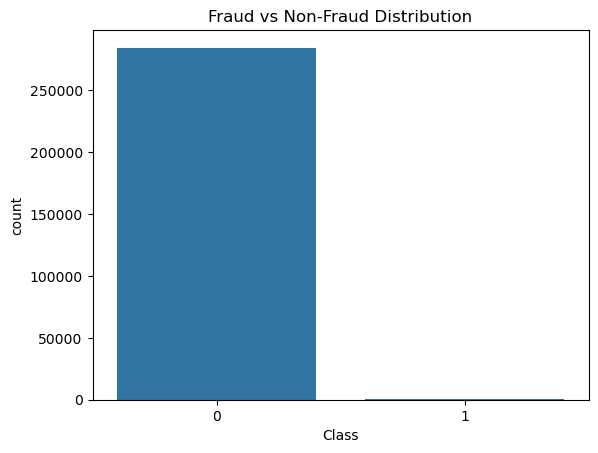

In [4]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


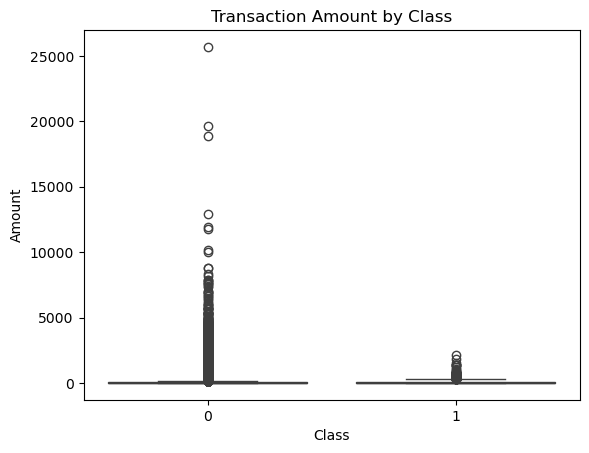

In [5]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount by Class")
plt.show()


In [6]:
X = df.drop('Class', axis=1)
y = df['Class']
X
y


0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler

StandardScaler()

In [8]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print(pd.Series(y_resampled).value_counts())


C:\Users\Rahul RS\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Rahul RS\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Rahul RS\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rahul RS\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^

Class
0    284315
1    284315
Name: count, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.3,
    random_state=42,
    stratify=y_resampled
)
X_train, X_test, y_train, y_test

(array([[-1.39261742e+00, -1.48141278e+01,  9.73770423e+00, ...,
          3.18357795e+00,  1.13460428e+00,  4.65392456e-02],
        [-5.90819209e-01,  5.81901321e-01,  1.75139900e-01, ...,
          2.32595399e-02,  1.46412720e-02, -3.13288512e-01],
        [-1.12727560e+00, -6.47779879e+00,  3.96668544e+00, ...,
         -1.85583379e+00, -1.55928930e+00, -2.01474152e-01],
        ...,
        [-3.57771167e-01, -8.84166530e-01,  4.94969499e-01, ...,
         -6.68701664e-01, -9.62497570e-01, -3.93796267e-02],
        [ 7.53371236e-01, -1.19223617e+00,  2.74608196e-01, ...,
         -5.10260362e-01,  1.12856888e+00,  7.89637246e-02],
        [-1.13571404e+00,  5.41476296e-01, -1.61234042e-02, ...,
          1.30209155e-01,  8.15646871e-02, -2.57275324e-01]]),
 array([[-0.99224712, -7.54965491,  4.83735257, ..., -3.6028696 ,
         -2.14444817, -0.21865359],
        [ 0.33983573,  0.7955395 , -0.80867984, ..., -0.29230491,
         -0.02444401,  0.64629216],
        [ 0.83227528,  1.

In [10]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [11]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85295
           1       0.97      0.92      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

ROC-AUC: 0.9897595052632668


In [13]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

ROC-AUC: 0.9999996288049926


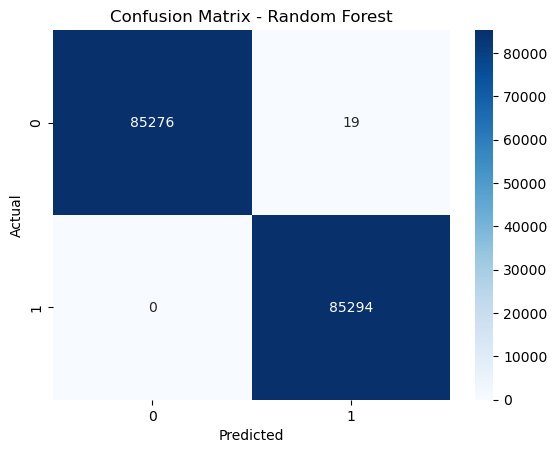

In [14]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [15]:
custom_threshold = 0.3
y_custom_pred = (y_prob_rf >= custom_threshold).astype(int)

print(classification_report(y_test, y_custom_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [20]:
X = df.drop("Class", axis=1)
scaler.fit(X)


StandardScaler()

In [21]:
feature_names = X.columns.tolist()


In [22]:
import pandas as pd

new_transaction = pd.DataFrame(
    [[0.1, -1.2, 0.3] + [0]*25 + [45.0, 12345]],
    columns=feature_names
)


In [23]:
new_transaction_scaled = scaler.transform(new_transaction)

fraud_prob = rf.predict_proba(new_transaction_scaled)[0][1]

print("Fraud Probability:", fraud_prob)


Fraud Probability: 0.01
